In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import nglview as nv

In [23]:
# The colvar header has extra names 
header = "time d1 fps.lp fps.ld rmsd funnel.bias metad.bias lwall.bias lwall.force2 uwall-rmsd.bias uwall-rmsd.force2 uwall.bias uwall.force2 distwall.bias distwall.force2"
column_names = header.split(" ")

In [24]:
colvar = pd.read_csv('COLVAR', sep="\s+", skiprows=1, names=column_names)
colvar.columns

Index(['time', 'd1', 'fps.lp', 'fps.ld', 'rmsd', 'funnel.bias', 'metad.bias',
       'lwall.bias', 'lwall.force2', 'uwall-rmsd.bias', 'uwall-rmsd.force2',
       'uwall.bias', 'uwall.force2', 'distwall.bias', 'distwall.force2'],
      dtype='object')

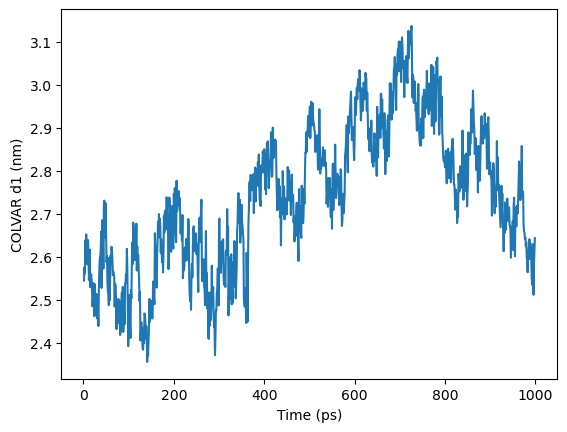

In [25]:
cv_colvar = colvar['d1']
time = colvar['time']
plt.plot(time, cv_colvar)
plt.xlabel('Time (ps)')
plt.ylabel('COLVAR d1 (nm)')
plt.savefig('d1_colvar.png')

In [26]:
header = "time d1 sigma_d1 height biasf"  
column_names = header.split(" ")

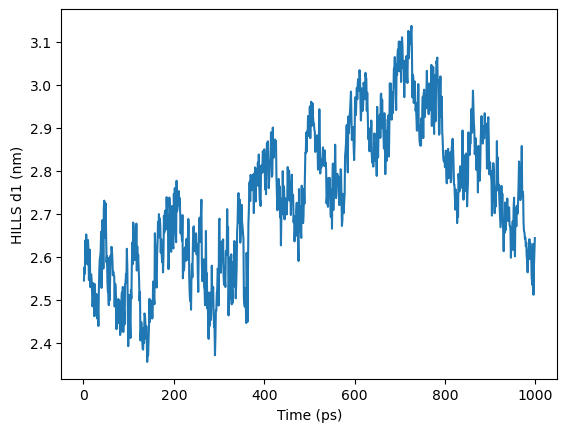

In [27]:
hills = pd.read_csv('HILLS', sep="\s+", skiprows=3, names=column_names)
time = hills['time']
cv_hills = hills['d1']
plt.xlabel('Time (ps)')
plt.ylabel('HILLS d1 (nm)')
plt.plot(time, cv_hills)
plt.savefig('d1_hills.png')


In [28]:
print("COLVAR CV range:", min(cv_colvar), max(cv_colvar))
print("HILLS CV range:", min(cv_hills), max(cv_hills))

COLVAR CV range: 2.354873 3.136835
HILLS CV range: 2.354872719836444 3.136835401155505


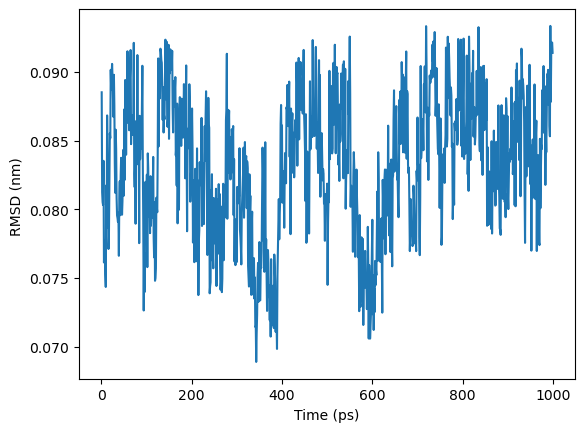

In [29]:
rmsd_colvar = colvar['rmsd']
time = colvar['time']
plt.plot(time, rmsd_colvar)
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (nm) ')
plt.savefig('colvar_rmsd.png')

Calculate rmsd using mdtraj

In [34]:
traj = mdj.load_dcd('outputs/traj.dcd', 'inputs/complex.gro')
pdb = mdj.load('inputs/reference.pdb')

/home/nz/anaconda3/envs/funnel/lib/python3.10/site-packages/mdtraj/formats/gro.py:322: UserWarning: WARNING: two consecutive residues with same number (ARG, VAL)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, old_resname))
/home/nz/anaconda3/envs/funnel/lib/python3.10/site-packages/mdtraj/formats/gro.py:322: UserWarning: WARNING: two consecutive residues with same number (TYR, GLY)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, old_resname))
/home/nz/anaconda3/envs/funnel/lib/python3.10/site-packages/mdtraj/formats/gro.py:322: UserWarning: WARNING: two consecutive residues with same number (LYS, GLY)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, old_resname))
/home/nz/anaconda3/envs/funnel/lib/python3.10/site-packages/mdtraj/formats/gro.py:322: UserWarning: WARNING: two consecutive residues with same number (GLN, ALA)
  warnings.warn("WARNING: tw

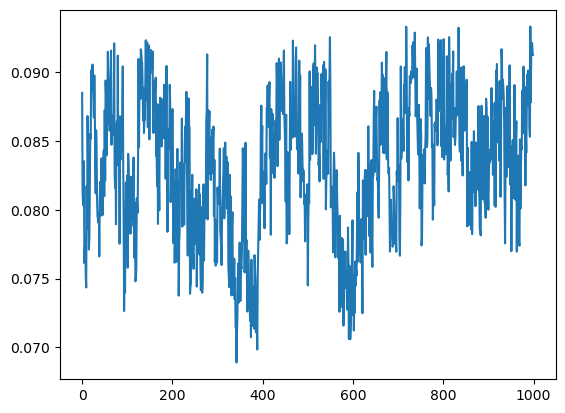

In [38]:
import numpy as np
protein = np.array([4,23,39,46,53,74,88,98,105,115,129,143,167,173,194,211,227,238,257,271,282,289,310,327,347,357,364,371,382,401,420,434,445,462,486,502,518,529,539,549,566,576,597,619,630,637,656,673,689,713,732,739,754,766,780,799,813,829,845,860,867,881,896,913,933,952,963,973,984,1006,1017,1036,1052,1077,1083,1094,1115,1129,1140,1154,1168,1187,1201,1215,1227,1246,1263,1282,1301,1323,1342,1364,1375,1385,1395,1406,1425,1439,1450,1474,1490,1500,1511,1530,1541,1568,1574,1588,1599,1609,1619,1630,1640,1647,1661,1678,1688,1707,1726,1737,1744,1768,1775,1789,1803,1825,1836,1847,1854,1868,1879,1908,1914,1926,1942,1961,1983,1993,2012,2034,2052,2058,2077,2096,2107,2119,2130,2141,2151,2173,2184,2194,2223,2229,2236,2253,2272,2286,2297,2311,2328,2348,2358,2368,2375,2396,2415,2430,2437,2444,2466,2478,2489,2499,2516,2523,2535,2546,2553,2568,2574,2590,2606,2616,2627,2634,2656,2675,2692,2699,2718,2734,2745,2769,2776,2787,2794,2804,2814,2831,2853,2867,2897,2903,2910,2926,2947,2961,2983,2999,3009,3023,3044,3060,3071,3095,3114,3136,3153,3167,3186,3196])
traj_selections = traj.atom_slice(protein)
rmsd = mdj.rmsd(traj_selections, pdb, 0)
plt.plot(rmsd)